<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/filippaolofsson-lab6/Lab6/filippaolofsson_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: differential equations**
**Filippa Olofsson**

# **Abstract**

This lab consists of two different problems, time stepping for scalar initial value problem and time stepping for a system of initial value problems. Both functions are used to approximate solutions to differential equations by using a a time steping method, in this lab the theta-method.  
The accuracy and stability are tested, which showed that the trapezoidal method (theta=0) seem to have the best approximation.



#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [134]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [135]:
# Load neccessary modules.
from google.colab import files
import time
import numpy as np
from scipy import optimize
import random 
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Method**

## 1. Function: Time stepping for scalar initial value problem du/dt = f(u,t) ##
The scalar initial value problem is refered to as eq. (13.1)
\begin{equation} \dot{u}(t) = f(u(t), t) \ \ \ \  0 < t \leq T \end{equation}
with the initial condition $u(0) = u_0$.

We want to find the approximation $U(t_n)$ for the time interval $[0, T]$. The algorithm is based on Alg. (13.3) from chapter 13.

Since the function below can handle vectors as well as scalars, the theta_method function is used for problem 1 and 2. 

In [136]:
def theta_method(T, f, u0, theta, k):
  t = 0
  u = u0
  while t < T:
    u = optimize.newton(lambda u: u - u0 - k*((1-theta)*f(u) + theta*f(u0)), u0)
    u0 = u
    t += k
  return u

### Test 1: Accuracy scalar IVP###
We can test the scalar IVP by comparing the approximated solution to the exact solution. 

From example 13.1 we know that if $f(u(t),t) = \alpha u(t)$ and the initial condition $u(0) = 1$, the exact solution to the IVP is the exponential function $u(t) = exp(\alpha t) $ for $t>0$

Therefore we can plot the approximated solution and the exact solution to compare the results. The theta-method is used for theta=[0, 0.5, 1] corresponding to the implicit Euler method, trapezoidal method and the explicit Euler method.

In [137]:
# ACCURACY
def test1_accuracy(theta):
  alpha = random.uniform(0.5,5)
  f = lambda u: alpha*u
  f_exact = lambda t: np.exp(alpha*t)
  u0 = 1 
  x = np.arange(0.1, 3, 0.1)
  U_t = lambda T: theta_method(T, f, u0, theta, 0.1)
  plt.plot(x, f_exact(x), label = "Exact solution: u(t)=exp(alpha*t)")
  plt.plot(x, [U_t(t) for t in x], label = f"Approximated solution for theta={theta}")
  plt.legend()
  plt.show()

### Test 1: Stability scalar IVP ###
The stability can be tested by using the following stable linear model problem: 
\begin{equation} \dot{u}(t) = \lambda u(t) \ \ 
0 < t \leq T (13.12)\\ u(0) = 1 \end{equation}

In chapter 13, section 13.4, we find that the model is A-stable if: 
\begin{equation}\theta = 0, \ \  |1−kλ|>1 \\
                 \theta = 0.5, \ \  Re(0.5kλ) < 0 \\
                 \theta = 1 \ \ |−1−kλ| < 1 \end{equation}

Therefore we can choose a model problem where $k=0.25$ and $\lambda=-10$. We then expect that the explicit Euler method ($\theta=1$) will be unstable. 


In [138]:
# STABILITY
def test1_stability(theta):
    T = 5
    n = 20
    k = T/n
    x = np.linspace(0, T, n)
    u0 = 1
    f = lambda u: -10*u
    U = lambda T: theta_method(T, f, u0, theta, k)
    plt.title(f"Stability of theta method with theta ={theta}")
    plt.plot(x, [U(t) for t in x])
    plt.show()

###2. Function: Time stepping for a system of  initial value problems du/dt = f(u,t) ###

Same function as in problem 1 is used.

###Test 2: Accuracy system IVP ###

In the same way as problem 1 is tested, the system IVP can be tested. The accuracy can be verified with the equations (14.3, 14.4) from chapter 14.

\begin{equation} \begin{bmatrix} \dot{\varphi}_1 \\ \dot{\varphi}_2 \end{bmatrix} = \begin{bmatrix} -\nu & \gamma \\ 0 & -\nu \end{bmatrix}  \begin{bmatrix} \varphi_1 \\ \varphi_2\end{bmatrix} \ \ \ (14.3)\end{equation}

\begin{equation} \varphi_1 = \gamma\kappa t e^{-\nu t} \\ \varphi_2 = \kappa e^{-\nu t} \end{equation}




In [139]:
# ACCURACY 
def test2_accuracy(theta):
  v = 1
  gamma = 2
  kappa = 5
  phi1 = lambda t: gamma*kappa*t*np.exp(-v*t)
  phi2 = lambda t: kappa*np.exp(-v*t)
  f = lambda u: np.array([[-v, gamma], [0, -v]]) @ u
  u0 = [phi1(0), phi2(0)]
  U1 = []
  U2 = []
  x = np.arange(0.1, 3, 0.1)
  for t in x:
      U2_T = theta_method(t, f, u0, theta, 0.1)
      U1.append(U2_T[0])
      U2.append(U2_T[1])
  plt.figure()
  plt.plot(x, U1, label='Approximated solution U1(t)')
  plt.plot(x, U2, label='Approximated solution U2(t)')
  plt.plot(x, [phi1(t) for t in x], label="exact solution phi1(t)")
  plt.plot(x, [phi2(t) for t in x], label="exact solution phi2(t)")
  plt.legend()
  plt.show()


###Test 2: Stability system IVP###
The stability of the system IVP can be tested by using the model problem (14.2) in chapter 14. 

[The matrices X and A are borrowed from a student VT21]

In [140]:
# STABILITY
def test2_stability(theta):
    X = np.array([[-2, 1],[5, 3]])
    A = X @ np.diag([3, 4]) @ np.linalg.inv(X)
    T = 5
    n = 20
    k = T/n
    x = np.linspace(0, T, n)
    f = lambda u: -A @ u 
    result = lambda T: theta_method(T, f, np.array([0.1, -0.1]), theta, k)
    plt.title(f"Stability of theta method with theta = {theta}")
    plt.plot(x, [result(t) for t in x])
    plt.show()

# **Results**

The results are plotted below. It can be seen that the trapezoidal method does seem to have the best approximation. 

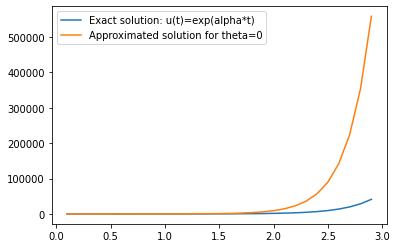

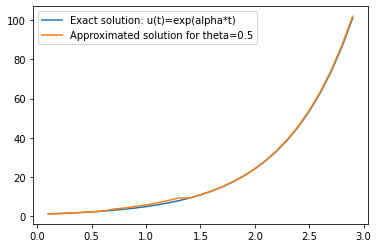

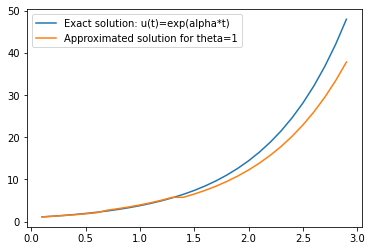

In [141]:
test1_accuracy(0)
test1_accuracy(0.5)
test1_accuracy(1)

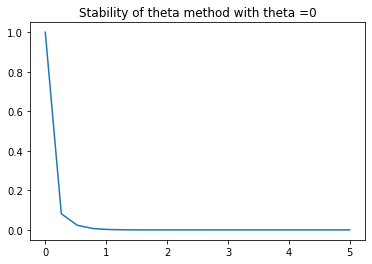

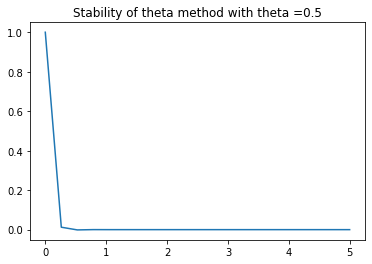

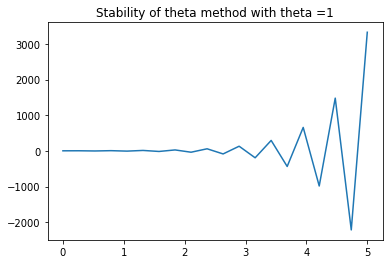

In [142]:
test1_stability(0)
test1_stability(0.5)
test1_stability(1)

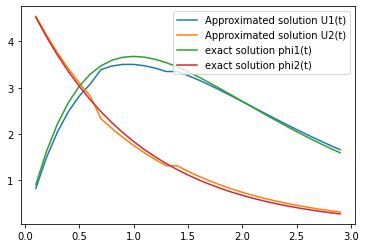

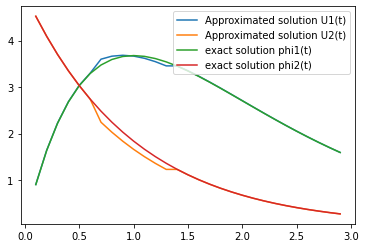

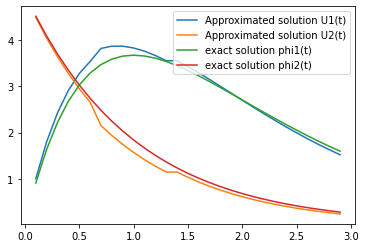

In [143]:
test2_accuracy(0)
test2_accuracy(0.5)
test2_accuracy(1)

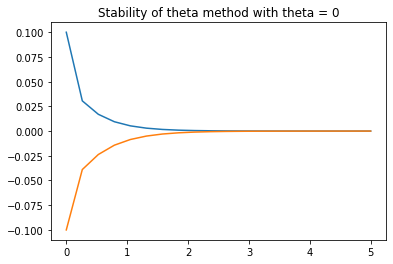

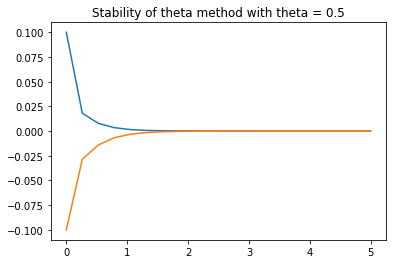

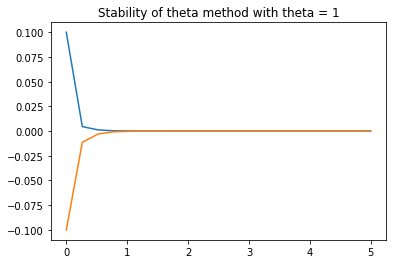

In [144]:
test2_stability(0)
test2_stability(0.5)
test2_stability(1)

# **Discussion**

The results of the approximations are good and as mentioned the trapezoidal method seem to have the best approximation. If I had more time I would also have liked to visualize the stability as regions in the complex plane, which was illustrated in the book (Figure 13.4). 

We can see that the stability of the scalar IVP for the explicit Euler method ($\theta=1$) is in fact unstable. The other tests seem to be stable.

I found it a little bit tricky to implement the tests, so I had to look at older students lab reports. The lab has also been discussed with Hanna Klingberg. 

